In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

[*********************100%***********************]  1 of 1 completed


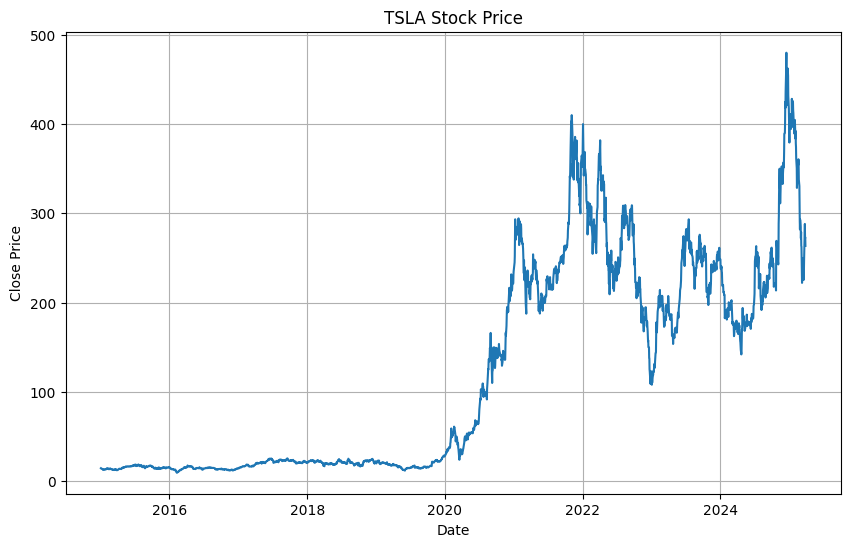

In [12]:
start_date = "2015-01-01"
end_date = "2025-03-31"
stock_symbol = "TSLA"  # You can change this

data = yf.download(stock_symbol, start=start_date, end=end_date)
data = data[['Close']]
data.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title(f'{stock_symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [13]:
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
# Optional: comment MA100 for now to keep more data
# data['MA100'] = data['Close'].rolling(window=100).mean()

# Target is next day price
data['Target'] = data['Close'].shift(-1)

# Drop rows with any NaNs
data.dropna(inplace=True)

# Feature and target
X = data[['Close', 'MA10', 'MA50']]
y = data['Target']

# Confirm shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

# NOW split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print("Split successful 🎯")

X shape: (2525, 3)
y shape: (2525,)
Split successful 🎯


Mean Squared Error: 91.55087236501018
Mean Absolute Error: 6.707062715595327
R2 Score: 0.9800328316271456


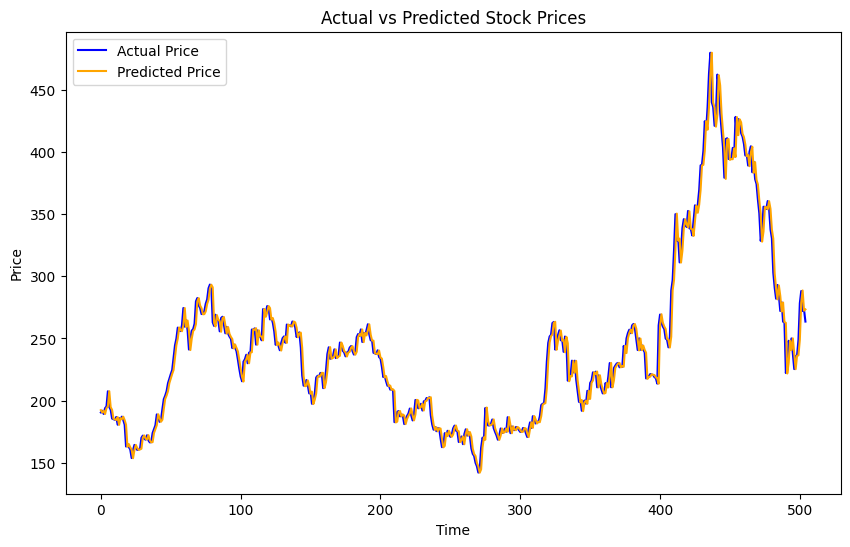

In [16]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
predictions = model.predict(X_test)


# Plotting actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='orange')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

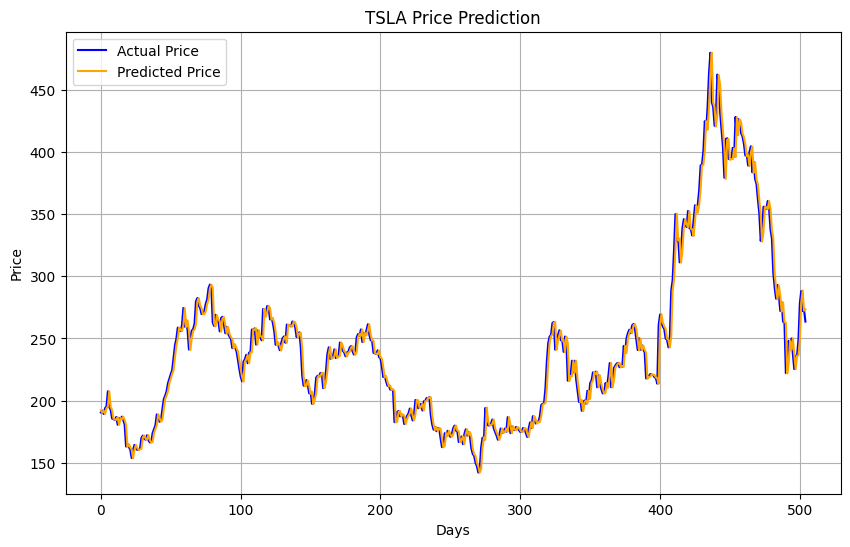

In [17]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='orange')
plt.title(f'{stock_symbol} Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 6.707062715595327
MSE: 91.55087236501018
RMSE: 9.568222006465474


Predicted next close: 273.3446421730454
Predicted next close: 273.5249597421298
Predicted next close: 273.6563270871352
Predicted next close: 273.72186292737626
Predicted next close: 273.73406993579454
Predicted next close: 273.6933852231102
Predicted next close: 273.614913594659


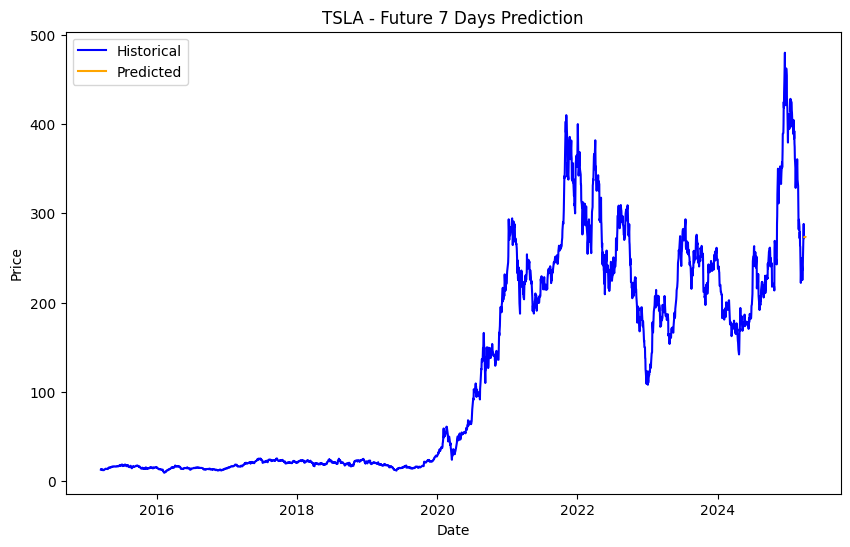

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Ensure future_df has a flat index and proper 'Close' column
future_df = pd.DataFrame(data['Close'])  # copy only Close prices
future_df.columns = ['Close']  # just to be safe

future_days = 7

for _ in range(future_days):
    # Get last known values
    last_close = float(future_df['Close'].iloc[-1])
    ma10 = future_df['Close'].rolling(window=10).mean().iloc[-1]
    ma50 = future_df['Close'].rolling(window=50).mean().iloc[-1]

    # Check for NaNs
    if pd.isna(ma10) or pd.isna(ma50):
        print("Not enough data to compute moving averages. Stopping prediction.")
        break

    # Prepare input and predict next close price
    next_input = np.array([[last_close, float(ma10), float(ma50)]])
    next_pred = model.predict(next_input)[0]
    print("Predicted next close:", next_pred)

    # Append prediction to future_df
    next_date = future_df.index[-1] + pd.Timedelta(days=1)
    new_row = pd.DataFrame({'Close': [next_pred]}, index=[next_date])
    future_df = pd.concat([future_df, new_row])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Historical', color='blue')
plt.plot(future_df['Close'].iloc[-future_days:], label='Predicted', color='orange')
plt.title(f'{stock_symbol} - Future {future_days} Days Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [44]:
print(future_df.tail(10))

                 Close
2025-03-25  288.140015
2025-03-26  272.059998
2025-03-27  273.130005
2025-03-28  273.344642
2025-03-29  273.524960
2025-03-30  273.656327
2025-03-31  273.721863
2025-04-01  273.734070
2025-04-02  273.693385
2025-04-03  273.614914


In [45]:
import joblib

In [46]:
joblib.dump(model, 'linear_regression_model.pkl')
print("Linear Regression model saved ✅")

Linear Regression model saved ✅
